In [6]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank
import pandas
from cw2 import sorted_barplot
from scipy.stats import norm
import matplotlib.gridspec as gridspec

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [3]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players
M = W.shape[0]
# Number of Games
N = G.shape[0]

# Gibbs sampling (This may take a minute)

In [4]:
# number of iterations
num_iters = 1100
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)

np.savetxt('skill_samples{}.csv'.format(num_iters), skill_samples, delimiter=',')


100%|██████████| 1100/1100 [00:28<00:00, 38.60it/s]


In [5]:
# code to calculate when the mean and variance stay constant
samples = np.genfromtxt('skill_samples11000.csv', delimiter = ',')

players = [5,15,70]

thinned = samples[:, 50::10]
shape = thinned.shape
print(shape)

# for p in players:
#     mean = np.zeros(shape[1])
#     var = np.zeros(shape[1])
#     for i in range(shape[1]):
#         mean[i] = np.mean(thinned[p, :i])
#         var[i] = np.var(thinned[p, :i])

gs = gridspec.GridSpec(1,2)

fig = plt.figure(figsize=(10, 4), dpi=80)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for player in players:
    mean = np.zeros(shape[1])
    var = np.zeros(shape[1])
    for i in range(shape[1]):
        mean[i] = np.mean(thinned[player, :i])
        var[i] = np.var(thinned[player, :i])
    ax1.plot(mean, label = W[player][0])
    ax2.plot(var, label = W[player][0])

ax1.set_xlabel('samples')
ax1.set_ylabel('mean skill level')
ax1.set_title('(a) Mean of Thinned Samples')
ax2.set_xlabel('samples')
ax2.set_ylabel('variance')
ax2.set_title('(b) Variance of Thinned Samples')
ax2.legend()
fig.savefig('a.convergence.eps', format = 'eps', transparent=True, bbox_inches='tight')
plt.show()



(107, 1095)


NameError: name 'gridspec' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


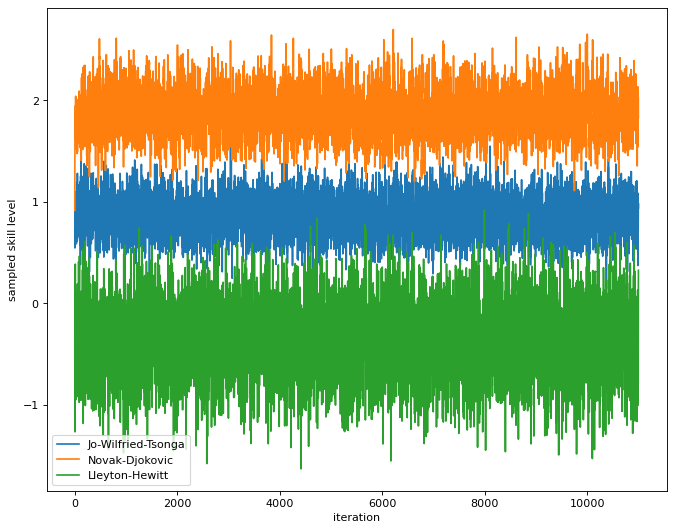

In [ ]:
# plotting player skills vs gibbs iteration

fig = plt.figure(figsize=(10, 8), dpi=80)

players = [5,15,70]

for player in players:    
    plt.plot(skill_samples[player], label = W[player][0])
plt.xlabel('iteration')
plt.ylabel('sampled skill level')
plt.legend()
plt.savefig('a.skills.eps', format = 'eps')
plt.show()


Text(0, 0.5, 'autocorrelation')

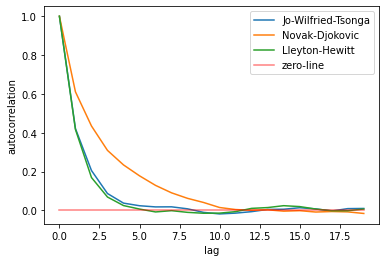

In [ ]:
# Code for plotting the autocorrelation function for player p
ac_iters = 20
autocor = np.zeros((3,ac_iters))
# for i in range(ac_iters):
#     autocor[i]=pandas.Series.autocorr(pandas.Series(skill_samples[p,:]),lag=i)

for p in range(len(players)):
    for i in range(ac_iters):
        autocor[p][i]=pandas.Series.autocorr(pandas.Series(skill_samples[players[p],:]),lag=i)
    plt.plot(autocor[p], label=W[players[p]][0])
z = np.zeros(ac_iters)
plt.plot(z, alpha = 0.5, color = 'r', label = 'zero-line')
plt.legend()
plt.xlabel('lag')
plt.ylabel('autocorrelation')


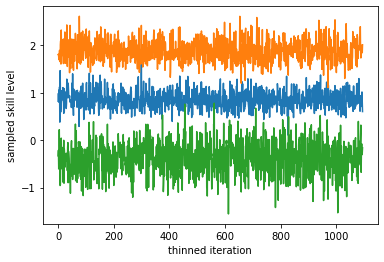

In [ ]:
for player in players:    
    plt.plot(skill_samples[player][50::10], label = W[player][0])
plt.xlabel('thinned iteration')
plt.ylabel('sampled skill level')
# plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


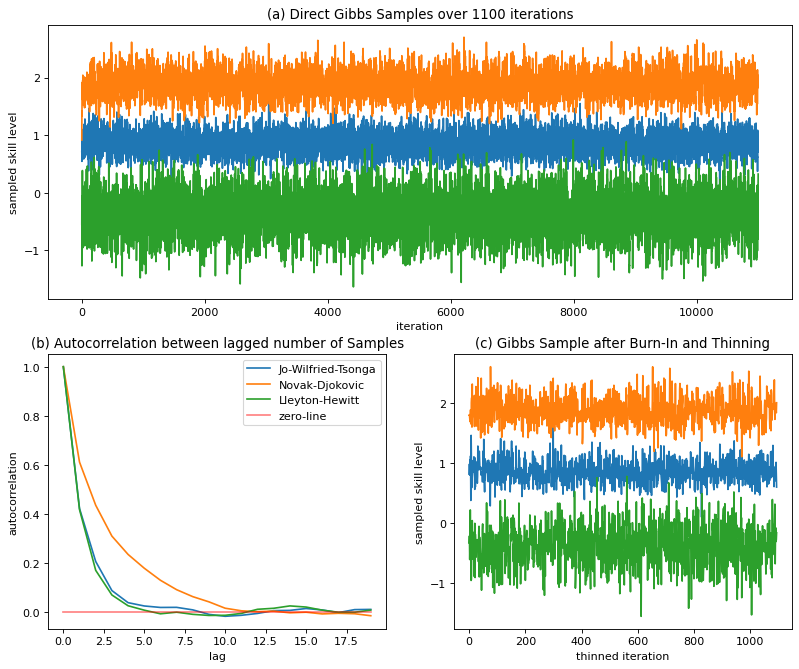

In [ ]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(12, 10), dpi=80)
ax1 = fig.add_subplot(gs[0, :])
for player in players:    
    ax1.plot(skill_samples[player], label = W[player][0])
ax1.set_xlabel('iteration')
ax1.set_ylabel('sampled skill level')
ax1.set_title('(a) Direct Gibbs Samples over 1100 iterations')

ax2 = fig.add_subplot(gs[1, 0]) # row 1, col 0

ac_iters = 20
autocor = np.zeros((3,ac_iters))

for p in range(len(players)):
    for i in range(ac_iters):
        autocor[p][i]=pandas.Series.autocorr(pandas.Series(skill_samples[players[p],:]),lag=i)
    ax2.plot(autocor[p], label=W[players[p]][0])
z = np.zeros(ac_iters)
ax2.plot(z, alpha = 0.5, color = 'r', label = 'zero-line')
ax2.legend()
ax2.set_xlabel('lag')
ax2.set_ylabel('autocorrelation')
ax2.set_title('(b) Autocorrelation between lagged number of Samples')

ax3 = fig.add_subplot(gs[1, 1]) # row 1, col 1

for player in players:    
    ax3.plot(skill_samples[player][50::10], label = W[player][0])
ax3.set_xlabel('thinned iteration')
ax3.set_ylabel('sampled skill level')
ax3.set_title('(c) Gibbs Sample after Burn-In and Thinning')

fig.savefig('a.all.eps', format = 'eps', transparent=True, bbox_inches='tight')
plt.show()

# EP ranking

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


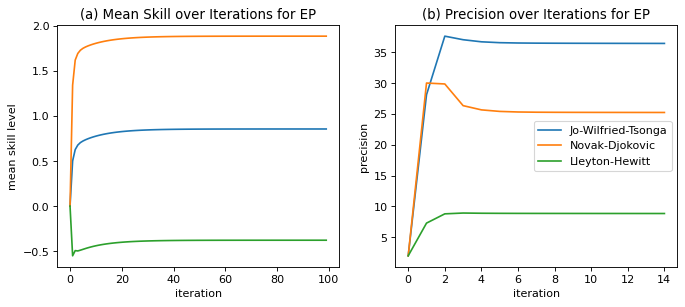

In [9]:
num_iters = 100
# run message passing algorithm, returns mean and precision for each player
mean_player_skills, precision_player_skills, mean_array, precision_array = eprank(G, M, num_iters)

x = np.array(range(num_iters))

gs = gridspec.GridSpec(1,2)


fig = plt.figure(figsize=(10, 4), dpi=80)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for player in [5,15,70]:    
    ax1.plot(x, mean_array[player], label = W[player][0])
    ax2.plot(x[:15], precision_array[player, :15], label = W[player][0])

ax1.set_xlabel('iteration')
ax1.set_ylabel('mean skill level')
ax1.set_title('(a) Mean Skill over Iterations for EP')
ax2.set_xlabel('iteration')
ax2.set_ylabel('precision')
ax2.set_title('(b) Precision over Iterations for EP')
ax2.legend()
fig.savefig('b.all.eps', format = 'eps', transparent=True, bbox_inches='tight')
plt.show()


In [ ]:
skill_probabilities = np.zeros((4, 4))
win_probabilities = np.zeros((4, 4))

players = [0, 4, 10, 15]

for i in range(4):
    for j in range(4):
        player1 = players[i]
        player2 = players[j]
        mean = mean_player_skills[player2] - mean_player_skills[player1]
        sd_skill = np.sqrt((1./precision_player_skills[player1]) + (1./precision_player_skills[player2]))
        skill_probabilities[i, j] = norm.cdf(0, mean, sd_skill)

        sd_win = np.sqrt(sd_skill**2 + 1)
        win_probabilities[i, j] = norm.cdf(0, mean, sd_win)

names = [W[i][0] for i in players]
print(names)
print(skill_probabilities)
print(win_probabilities)


['Rafael-Nadal', 'Roger-Federer', 'Andy-Murray', 'Novak-Djokovic']
[[0.5        0.42717016 0.7665184  0.06017779]
 [0.57282984 0.5        0.81083525 0.09111473]
 [0.2334816  0.18916475 0.5        0.01467851]
 [0.93982221 0.90888527 0.98532149 0.5       ]]
[[0.5        0.4816481  0.57310992 0.34463295]
 [0.5183519  0.5        0.59087902 0.36197303]
 [0.42689008 0.40912098 0.5        0.28017431]
 [0.65536705 0.63802697 0.71982569 0.5       ]]


# PART D METHOD COMPARISONS

In [ ]:
# approximating marginal skill by gaussian (1)
skill_samples = np.genfromtxt('skill_samples100050.csv', delimiter = ',')
djokovic = skill_samples[15][50::10]
nadal = skill_samples[0][50::10]

print(djokovic.shape)

mu_d = np.mean(djokovic)
mu_n = np.mean(nadal)

var_d = np.var(djokovic)
var_n = np.var(nadal)

mu = mu_d - mu_n
var = var_d + var_n

skill_prob = 1 - norm.cdf(0, mu, np.sqrt(var))


print('Probability Djokovic has a higher skill than Nadal is: {}'.format(skill_prob))

(10000,)
Probability Djokovic has a higher skill than Nadal is: 0.9256499207134268


In [ ]:
# approximating marginal skill by joint gaussian (2)
djokovic = skill_samples[15][50::10]
nadal = skill_samples[0][50::10]

mu_d = np.mean(djokovic)
mu_n = np.mean(nadal)

cov = np.cov([djokovic, nadal], bias=True)
print(cov[1,0])


mu = mu_d - mu_n
var = cov[0,0] + cov[1,1] - 2*cov[0,1]

skill_prob = 1 - norm.cdf(0, mu, np.sqrt(var))

print('Probability Djokovic beats Nadal is: {}'.format(skill_prob))

# players = [0, 4, 10, 15]
# joint_skills = np.zeros((4,4))

# for i in range(4):
#     for j in range(4):
#         player1 = skill_samples[players[i]][50:]
#         player2 = skill_samples[players[j]][50:]
#         mu = np.mean(player2) - np.mean(player1)
#         cov = np.cov([player1, player2], bias=True)
#         var = cov[0,0] + cov[1,1] - 2*cov[0,1]
#         joint_skills[i, j] = norm.cdf(0, mu, np.sqrt(var))

# names = [W[i][0] for i in players]
# print(names)
# print(joint_skills)

0.009312631087639104
Probability Djokovic beats Nadal is: 0.9496989305284469


In [ ]:
# approximating skill directly from samples (3)

freq = djokovic > nadal

skill_prob = np.mean(djokovic > nadal)
print(skill_prob)

# PART D GRAPHS

  0%|          | 0/5000 [00:00<?, ?it/s]/Users/macbookpro2018/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/macbookpro2018/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-45-5f8ba692df44>:17: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(thinned_samples[:, :i], bias = True)
/Users/macbookpro2018/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/macbookpro2018/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
<ipython-input-45-5f8ba692df44>:18: RuntimeWarning: invalid value encountered in less
  num_neg = np.sum(cov<0)
100%|██████████

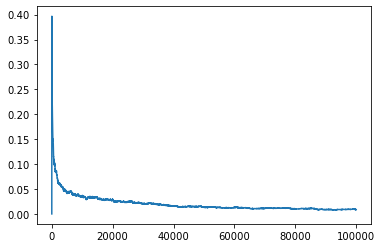

In [ ]:
from tqdm import tqdm

skill_samples = np.genfromtxt('skill_samples100050.csv', delimiter = ',')

thinned_samples = skill_samples[:, 50:]
shape = thinned_samples.shape

# cov = np.cov(thinned_samples, bias = True)
# num_neg = np.sum(cov<0)
# print(num_neg)
# ratio = (107*106-num_neg)/(107*106)
# print(ratio)

ratios = np.zeros(5000)
x = np.linspace(0, shape[1], 5000)
for i in tqdm(range(0,shape[1], 20)):
    cov = np.cov(thinned_samples[:, :i], bias = True)
    num_neg = np.sum(cov<0)
    t = i/20
    ratios[int(t)] = num_neg/(107*106)

neg_cov_data = np.array([x, ratios])
np.savetxt('neg_cov_data.csv', neg_cov_data, delimiter=',')

plt.plot(x, ratios)


No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


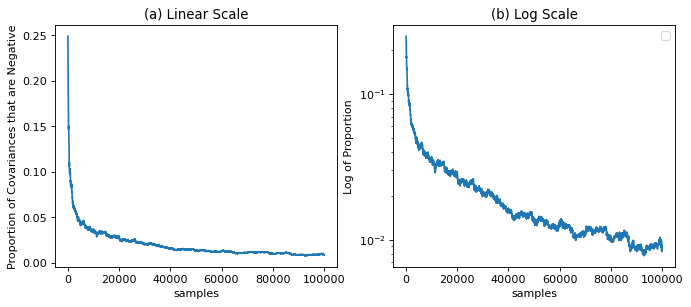

In [ ]:
data = np.genfromtxt('neg_cov_data.txt', delimiter=',')

# plt.semilogy(data[0], data[1])

gs = gridspec.GridSpec(1,2)

fig = plt.figure(figsize=(10, 4), dpi=80)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax1.plot(data[0,5:], data[1,5:])
ax2.semilogy(data[0][5:], data[1][5:])

ax1.set_xlabel('samples')
ax1.set_ylabel('Proportion of Covariances that are Negative')
ax1.set_title('(a) Linear Scale')
ax2.set_xlabel('samples')
ax2.set_ylabel('Log of Proportion')
ax2.set_title('(b) Log Scale')
ax2.legend()
fig.savefig('d.convergence.eps', format = 'eps', transparent=True, bbox_inches='tight')
plt.show()

# PART D SAMPLE COMPARISONS

In [ ]:
# approximating skill directly from samples (3)

skill_samples_100050 = np.genfromtxt('skill_samples100050.csv', delimiter=',')
skill_samples_11000 = np.genfromtxt('skill_samples11000.csv', delimiter=',')
skill_samples_1100 = np.genfromtxt('skill_samples1100.csv', delimiter=',')

thinned_big = skill_samples_100050[:, 50::10]
thinned_mid = skill_samples_11000[:, 50::10]
thinned_sml = skill_samples_1100[:, 50::10]
biggest = skill_samples_100050[:, 50:]
unthinned_big = skill_samples_11000[:, 50:]


In [ ]:
djokovic_biggest = biggest[15]
nadal_biggest = biggest[0]
djokovic_unthinned = unthinned_big[15]
nadal_unthinned = unthinned_big[0]
djokovic_big = thinned_big[15]
nadal_big = thinned_big[0]
djokovic_mid = thinned_mid[15]
nadal_mid = thinned_mid[0]
djokovic_sml = thinned_sml[15]
nadal_sml = thinned_sml[0]

djokovic = [djokovic_sml, djokovic_mid, djokovic_big, djokovic_unthinned, djokovic_biggest]
nadal = [nadal_sml, nadal_mid, nadal_big, nadal_unthinned, nadal_biggest]



In [ ]:
# METHOD 1: MARGINAL GAUSSIAN

for i in range(5):
    mu_d = np.mean(djokovic[i])
    mu_n = np.mean(nadal[i])

    var_d = np.var(djokovic[i])
    var_n = np.var(nadal[i])

    mu = mu_d - mu_n
    var = var_d + var_n

    skill_prob = 1 - norm.cdf(0, mu, np.sqrt(var))
    print(skill_prob)

0.926443489829113
0.9218146434554924
0.9256499207134268
0.9243856877524882
0.9230194501201026


In [ ]:
# METHOD 2: JOINT GAUSSIAN

for i in range(5):

    mu_d = np.mean(djokovic[i])
    mu_n = np.mean(nadal[i])

    cov = np.cov([djokovic[i], nadal[i]], bias=True)
    # print(cov[1,0])

    mu = mu_d - mu_n
    var = cov[0,0] + cov[1,1] - 2*cov[0,1]

    skill_prob = 1 - norm.cdf(0, mu, np.sqrt(var))
    print(skill_prob)

0.9662187107345253
0.9481922622886685
0.9496989305284469
0.9473005039382585
0.9487724951731608


In [ ]:
# METHOD 3: EMPIRICAL

for i in range(5):
    freq = djokovic[i] > nadal[i]
    skill_prob = np.mean(freq)
    print(skill_prob)

0.9619047619047619
0.947945205479452
0.9518
0.9504109589041095
0.95122


# PART E

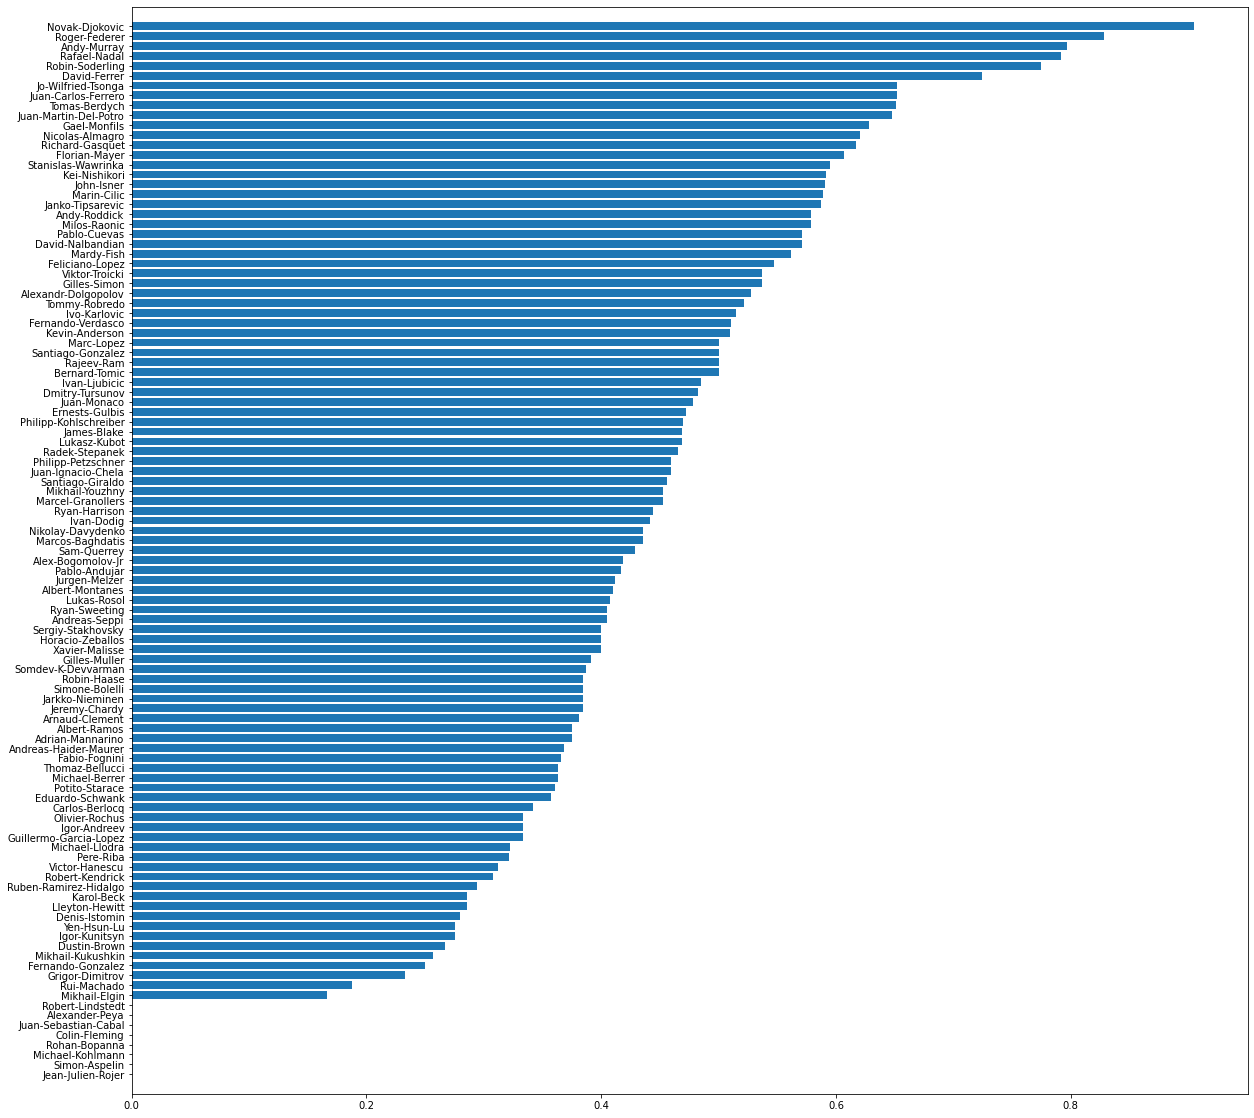

In [11]:
# games won/games played

wins = np.zeros(M)
losses = np.zeros(M)

for player in range(M):
    wins[player] = np.count_nonzero(G[:,0]==player)
    losses[player] = np.count_nonzero(G[:,1]==player)

P1 = wins/(wins+losses)

sorted_barplot(P1, W)


In [12]:
skill_samples = np.genfromtxt('skill_samples11000.csv', delimiter = ',')


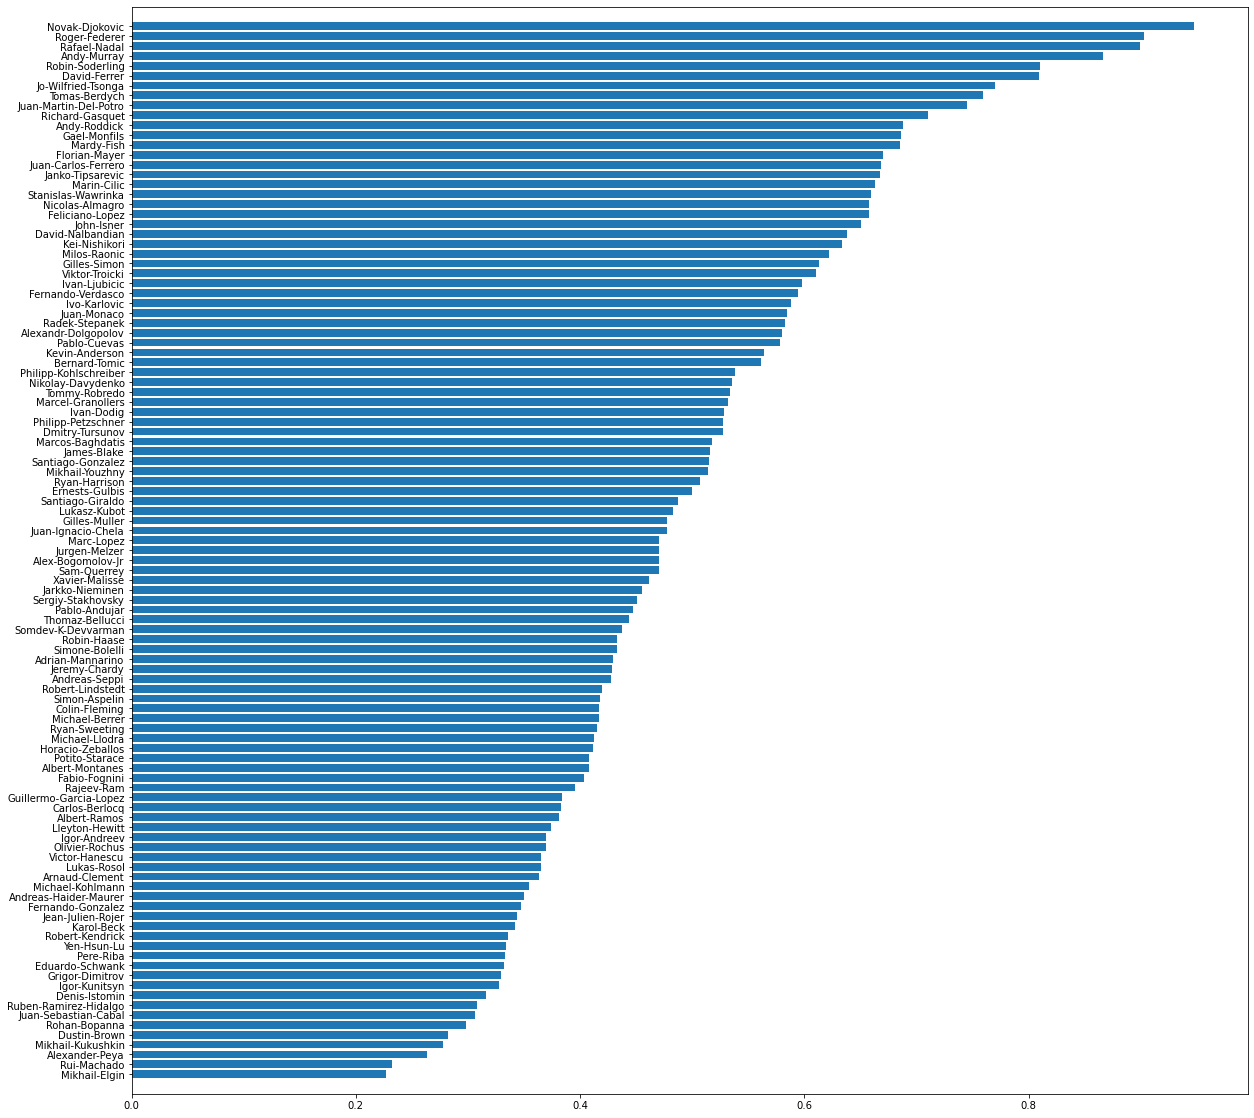

In [13]:
m = np.mean(skill_samples[:, 50::10], axis = 1)
cov = np.cov(skill_samples[:, 50::10], rowvar = 1, bias = True)
P = np.zeros((107,107))
for i in range(M):
    for j in [j for j in range(M) if j!=i]:
        mu = m[j] - m[i]
        var = cov[i,i] + cov[j,j] - 2*cov[i,j] + 1
        P[i,j] = norm.cdf(0, mu, np.sqrt(var))
P2 = np.mean(P, axis=1)*(107/106)

sorted_barplot(P2, W)

(107,)


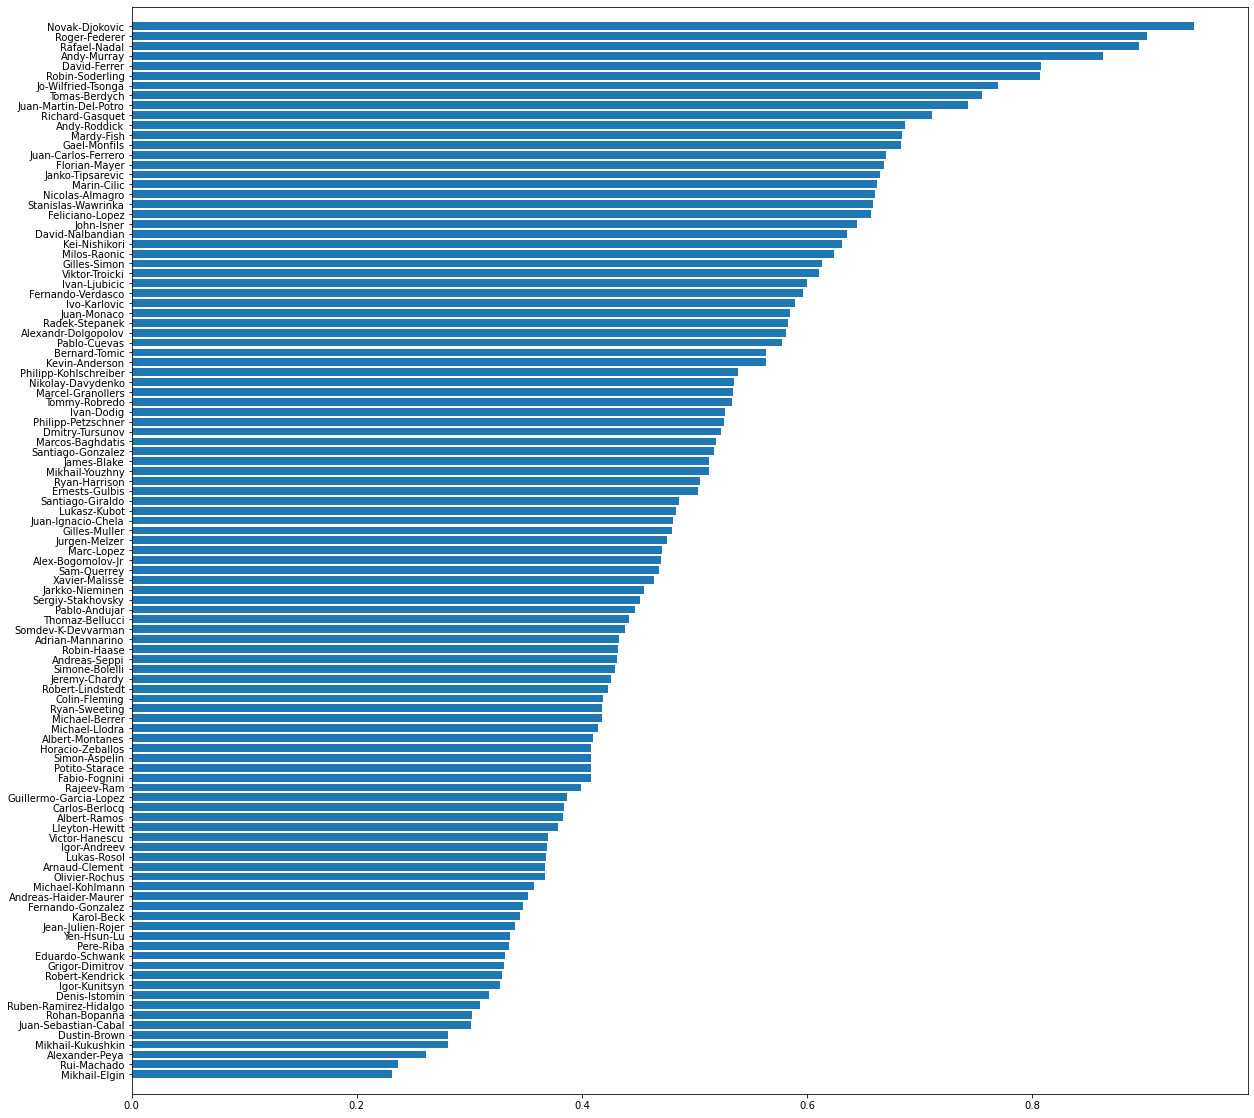

In [15]:
m = mean_player_skills
v = 1/precision_player_skills
P = np.zeros((107,107))
for i in range(M):
    for j in range(M):
        mu = m[j] - m[i]
        var = v[i]+v[j]+1 
        P[i,j] = norm.cdf(0, mu, np.sqrt(var))
P3 = np.mean(P, axis=1)

print(P3.shape)

sorted_barplot(P3, W)

43


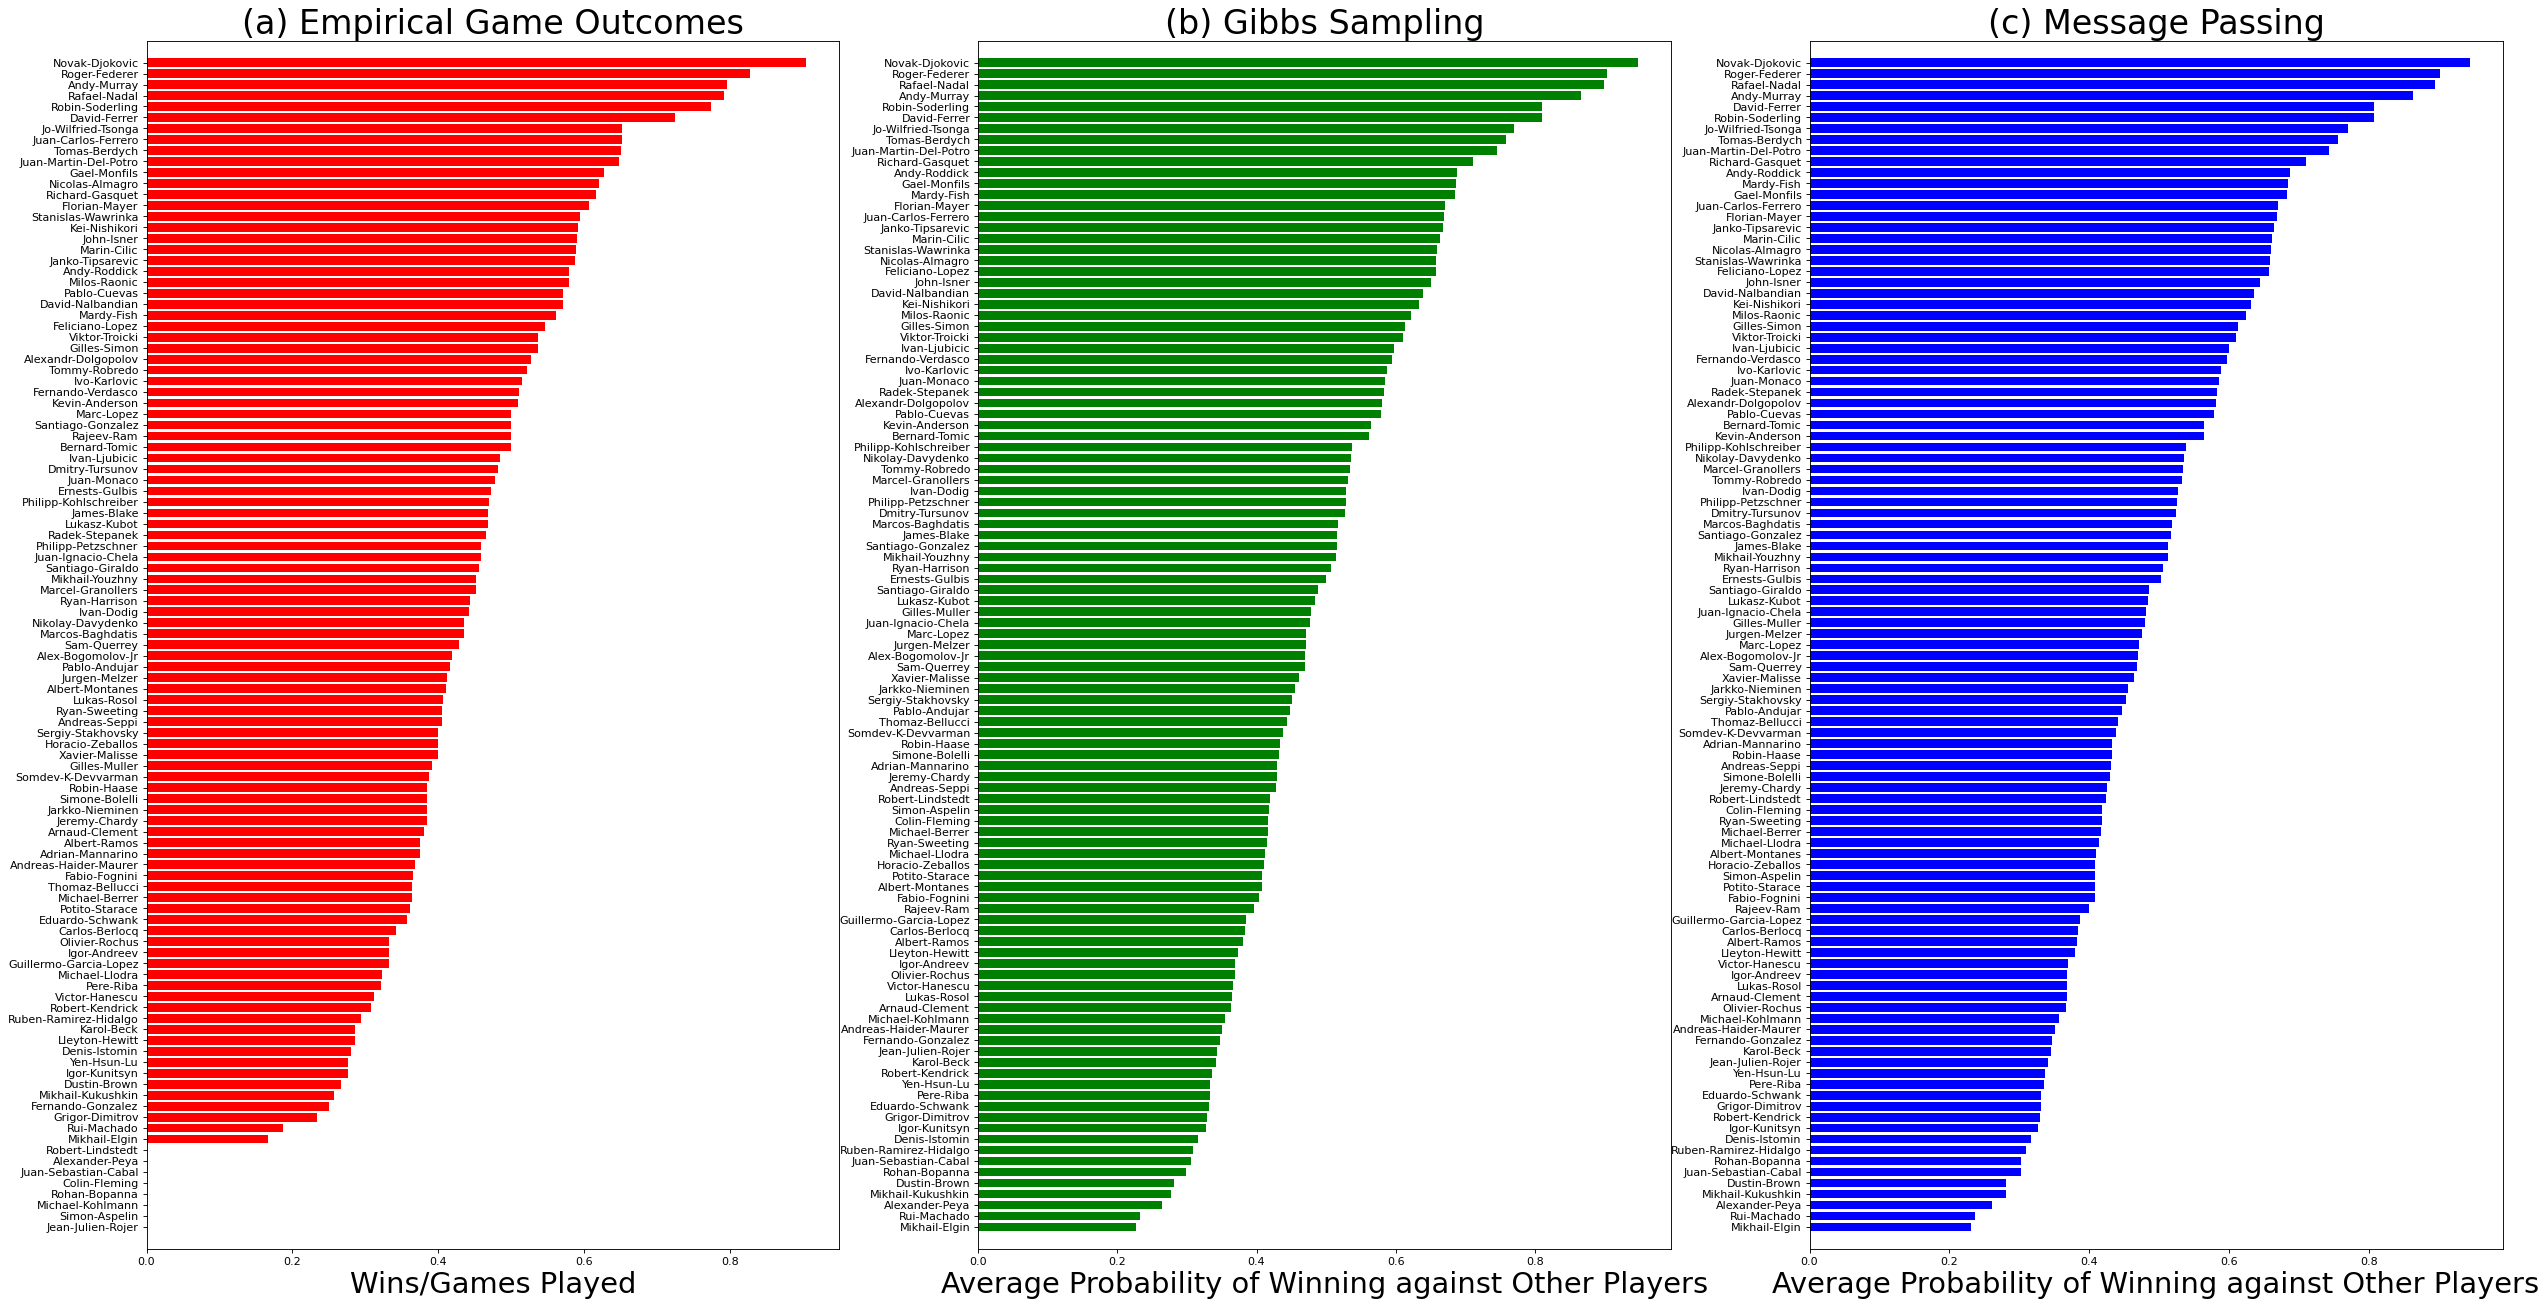

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.linalg.basic import pinv2

def barplots(P1, P2, P3, W):
    M = len(P1)
    xx = np.linspace(0, M, M)
    sorted_indices1 = np.argsort(P1)
    sorted_indices2 = np.argsort(P2)
    sorted_indices3 = np.argsort(P3)
    sorted_names1 = W[sorted_indices1]
    sorted_names2 = W[sorted_indices2]
    sorted_names3 = W[sorted_indices3]

    print(np.sum(sorted_indices2 != sorted_indices3))

    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(figsize=(38, 20), dpi=80)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.barh(xx, P1[sorted_indices1], color = 'r')
    ax1.set_yticks(np.linspace(0, M, M))
    ax1.set_yticklabels(sorted_names1[:, 0])
    ax1.set_ylim([-2, 109])
    ax1.set_xlabel('Wins/Games Played', fontsize = '26')
    ax1.set_title('(a) Empirical Game Outcomes', fontsize = '30')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.barh(xx, P2[sorted_indices2], color = 'g')
    ax2.set_yticks(np.linspace(0, M, M))
    ax2.set_yticklabels(sorted_names2[:, 0])
    ax2.set_ylim([-2, 109])
    ax2.set_xlabel('Average Probability of Winning against Other Players', fontsize = '26')
    ax2.set_title('(b) Gibbs Sampling', fontsize = '30')

    ax3 = fig.add_subplot(gs[0, 2])
    ax3.barh(xx, P3[sorted_indices3], color = 'b')
    ax3.set_yticks(np.linspace(0, M, M))
    ax3.set_yticklabels(sorted_names3[:, 0])
    ax3.set_ylim([-2, 109])
    ax3.set_xlabel('Average Probability of Winning against Other Players', fontsize = '26')
    ax3.set_title('(c) Message Passing', fontsize = '30')

    fig.savefig('e.all.eps', format = 'eps', transparent=True, bbox_inches='tight')
    plt.show()

barplots(P1, P2, P3, W)